# 图像增广

这里只使用 $torch$ 自带的图像增广方式, 也可以使用 [imgaug](https://github.com/aleju/imgaug) 进行图像增广

In [1]:
import torch
from torch import nn
import torchvision
import d2l.torch as d2l

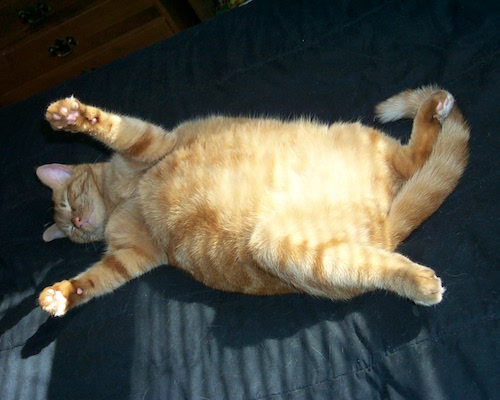

In [2]:
d2l.use_svg_display()
img = d2l.Image.open("img/cat.jpg")
img

定义一个应用图像增广的函数

In [3]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

有 $50\%$ 的几率使猫水平翻转

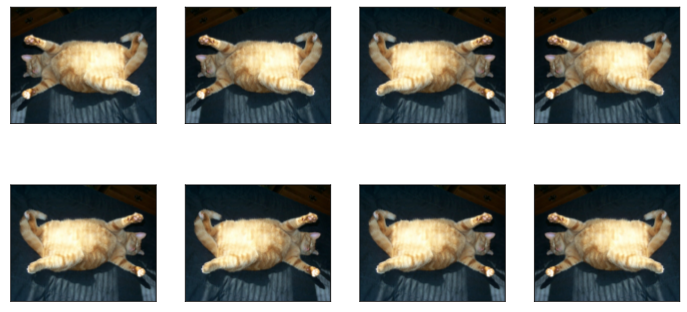

In [4]:
apply(img, torchvision.transforms.RandomHorizontalFlip(), scale=3)

有 $50\%$ 的几率使猫上下翻转

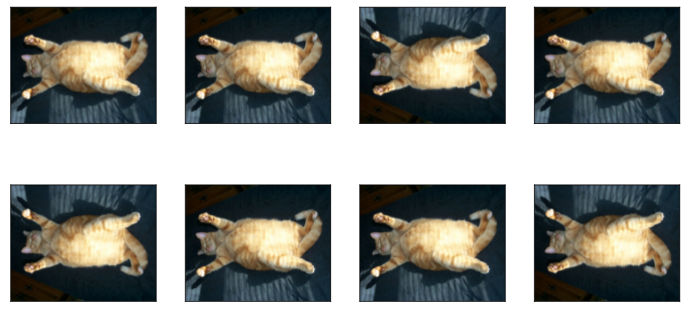

In [5]:
apply(img, torchvision.transforms.RandomVerticalFlip(), scale=3)

但是在实际的操作当中, 需要知道这样进行图像增广是否有意义, 比如上下翻转, 在这只猫上就可以做, 但是换一个地方就不一定可以了, 比如建筑物, 因为不存在倒过来的建筑物

随机取样, 取样的图片的 $size$ 为 $200\times 200$ , 图像的缩放 $scale$ 越接近 $0$ 表示越大, $scale$ 等于 $1$ 表示不缩放, $ratio$ 就是上下拉伸和左右拉伸, $ratio$ 是长宽比, 一般为 $[0.5,2]$

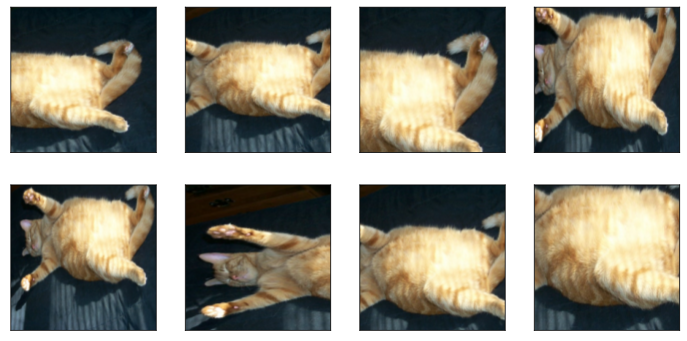

In [6]:
shape_aug = torchvision.transforms.RandomResizedCrop(size=(200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug, scale=3)

$brightness$ : 亮度

$contrast$ : 对比度

$saturation$ : 饱和度

$hue$ : 色调

可以输入一个数字或者是一个 $tuple$

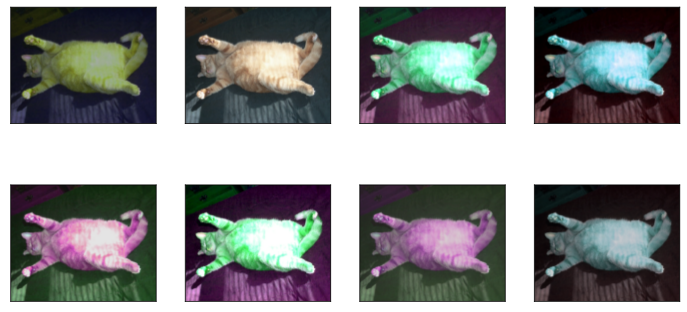

In [7]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), scale=3)

结合多种图像增广方法

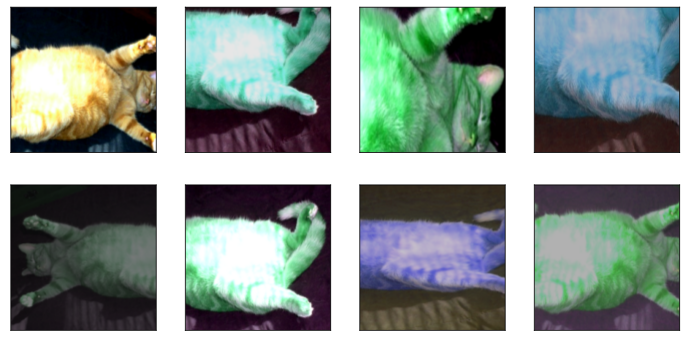

In [10]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    torchvision.transforms.RandomResizedCrop(size=(200, 200), scale=(0.1, 1), ratio=(0.5, 2))
])
apply(img, augs, scale=3)